In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matplotlib inline
%matplotlib inline

In [9]:
# Read data from csv file and return a pandas dataframe
def read_data(filename):
    df = pd.read_csv(filename)
    return df

In [10]:
df = read_data('Taxi.csv')
# Z-normalization of value column
df['value'] = (df['value'] - df['value'].mean()) / df['value'].std()

<AxesSubplot:title={'center':'Taxi Data'}, xlabel='timestamp'>

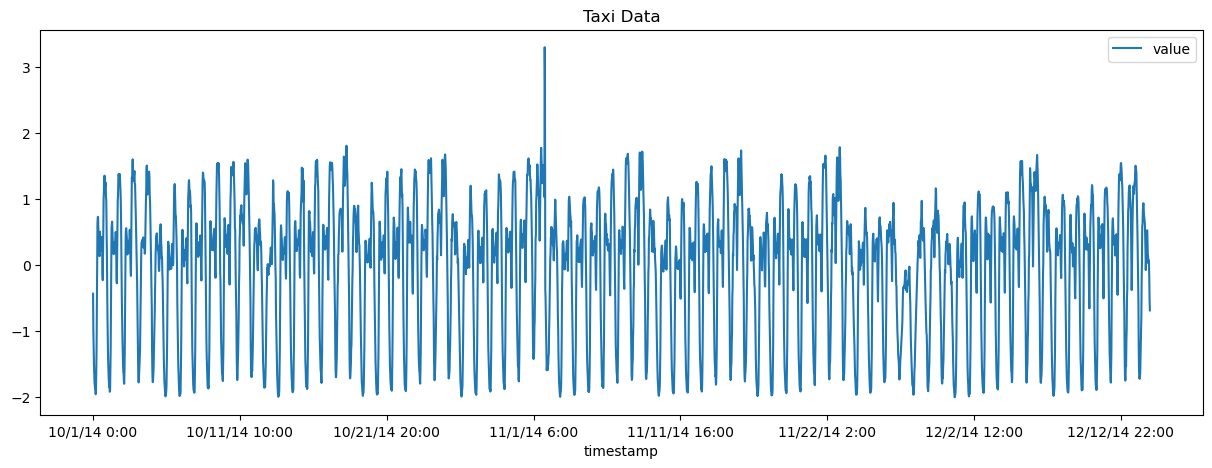

In [12]:
df.plot(x='timestamp', y='value', figsize=(15, 5), title='Taxi Data')

In [13]:
# Compute kurtosis of value column
kurtosis = df['value'].kurtosis()
print('Kurtosis: ', kurtosis)

Kurtosis:  -0.7096624351560346


In [15]:
window_length = 1

kurtosis_list = []

# For window length from 1 to 20% of the data length, use SMA to smooth the data and then compute the kurtosis
for window_length in range(1, int(len(df) * 0.2)):
    df['value_sma'] = df['value'].rolling(window=window_length).mean()
    kurtosis = df['value_sma'].kurtosis()
    kurtosis_list.append(kurtosis)

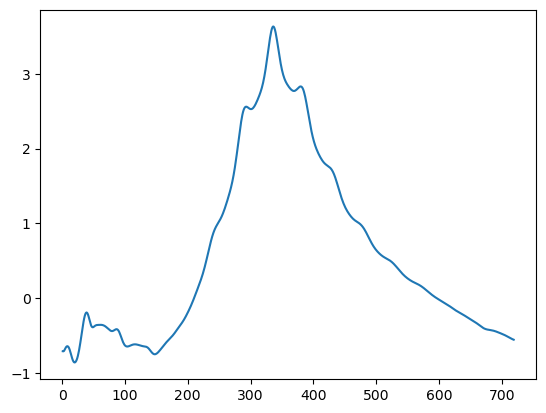

In [16]:
# Plot the kurtosis values
plt.plot(range(1, int(len(df) * 0.2)), kurtosis_list)